<a href="https://colab.research.google.com/github/aman2028-cloud/Car-Price-Predictior/blob/master/Face_final_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
from keras.preprocessing import image

In [ ]:
categories=['with_mask','without_mask']

In [7]:
import zipfile
with zipfile.ZipFile('/content/Covid.zip','r') as zip_ref:
    zip_ref.extractall('data')

In [10]:
data=[]
for category in categories:
    path=os.path.join('/content/data/train',category)
    label=categories.index(category)
    for img in os.listdir(path):
        img_path=os.path.join(path,img)
        img_arr=cv2.imread(img_path)
        img_arr=cv2.resize(img_arr,(224,224))
        data.append([img_arr,label])


In [11]:
len(data)

1279

In [12]:
import random
random.shuffle(data)

In [13]:
x=[]
y=[]

for features,labels in data:
    x.append(features)
    y.append(labels)

In [14]:
len(x)


1279

In [15]:
len(y)

1279

In [16]:
import numpy as np
x=np.array(x)
y=np.array(y)

In [17]:
x.shape

(1279, 224, 224, 3)

In [18]:
y.shape

(1279,)

In [19]:
y

array([1, 1, 0, ..., 0, 0, 1])

In [20]:
x=x/255


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [22]:
x_train.shape

(1023, 224, 224, 3)

In [23]:
x_test.shape

(256, 224, 224, 3)

In [24]:
import keras
num_classes=2
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_classes,activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [26]:
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.5321 - loss: 2.3448 - val_accuracy: 0.8164 - val_loss: 0.4979
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 146s 3s/step - accuracy: 0.7686 - loss: 0.5101 - val_accuracy: 0.9336 - val_loss: 0.2274
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.8881 - loss: 0.3064 - val_accuracy: 0.9453 - val_loss: 0.1641
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.9150 - loss: 0.2176 - val_accuracy: 0.9492 - val_loss: 0.1394
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.9466 - loss: 0.1570 - val_accuracy: 0.9492 - val_loss: 0.1417
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.9759 - loss: 0.0888 - val_accuracy: 0.9453 - val_loss: 0.1536
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - accuracy: 0.9590 - loss: 0.1303 - val_accuracy: 0.9375 - val_loss: 0.1401
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 137s 3s/step - accuracy: 0.9646 - loss: 0.0974 - val_accuracy: 0.9453 - val_l

In [27]:
acc=model.evaluate(x_test,y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 679ms/step - accuracy: 0.9370 - loss: 0.2112


In [28]:
print(acc)

[0.1715112328529358, 0.9375]


Enter the image path/content/data/train/with_mask/106-with-mask_jpg.rf.61ff5a31b563bb52deb449face22804c.jpg


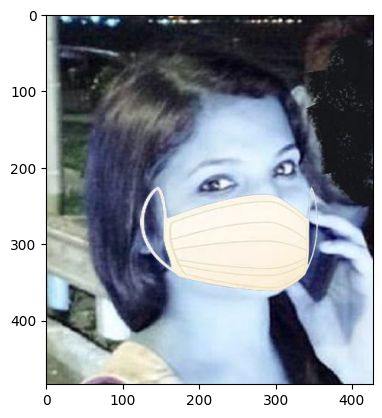

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[[0.89192116 0.13214709]]
0
The person is wearing mask


In [35]:
import matplotlib.pyplot as plt
input_image_path=input('Enter the image path')
input_image=cv2.imread(input_image_path)
plt.imshow(input_image)
plt.show()
input_image=cv2.resize(input_image,(224,224))
input_image=input_image/255
input_image_reshaped=np.reshape(input_image,[1,224,224,3])
input_prediction=model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label=np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label==0:
    print('The person is wearing mask')
else:
    print('The person is not wearing mask')

In [36]:
model.save('/content/mask_detector.keras')

In [37]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.4 MB/s eta 0:00:00


In [38]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import cv2
import numpy as np
import keras


model=keras.models.load_model('/content/mask_detector.keras')
st.title('Mask Detection')
input_image_path=st.file_uploader('Upload the image',type=['png','jpg','jpeg'])
if input_image_path is not None:
    input_image=cv2.imdecode(np.fromstring(input_image_path.read(),np.uint8),1)
    st.image(input_image,channels='BGR')
    input_image=cv2.resize(input_image,(224,224))
    input_image=input_image/255
    input_image_reshaped=np.reshape(input_image,[1,224,224,3])
    input_prediction=model.predict(input_image_reshaped)
    print(input_prediction)
    input_pred_label=np.argmax(input_prediction)
    print(input_pred_label)
    if input_pred_label==0:
        st.write('The person is wearing mask')
    else:
        st.write('The person is not wearing mask')

Writing app.py


In [39]:
! pip install pyngrok
! pip install ngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 43.5 MB/s eta 0:00:00


In [40]:
! ngrok config add-authtoken 30B3kmOCQeUMsOyQC7okgHGZbST_2j6DZnuGGLxtT7NcPVrHK

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [41]:
! nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [42]:
from pyngrok import ngrok
url=ngrok.connect(addr='8501')
url

<NgrokTunnel: "https://5462b9131a11.ngrok-free.app" -> "http://localhost:8501">